<a href="https://colab.research.google.com/github/RinzCSGO/Python/blob/main/traficLight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

%pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 6.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=73d2466dc10ad32e6b6d986bc2b14fe00bc50dc1cba202ab173398ebfbd67d9d
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [3]:
## Thư viện
import numpy as np
import skfuzzy as fz
from skfuzzy import control as ctrl

--------------------------------

Arrival : Người trên tuyến đèn xanh

Queue : Người chờ đèn đỏ

Extension : thời gian kéo dài đèn xanh


In [4]:
## xây dựng mảng không gian tương ứng
X = [0, 30, 45, 65, 85, 100]
Y = [0, 30, 45, 65, 85, 100]
Z = np.arange(0,65,1)
## Tiền đề và kết luận
A = ctrl.Antecedent( X, "Arrival")
Q = ctrl.Antecedent( Y, "Queue")
E = ctrl.Consequent( Z, "Extension")

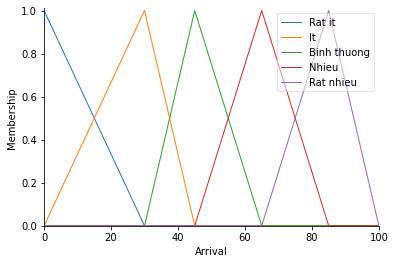

In [5]:
A["Rat it"] = fz.trimf( A.universe,[0,0,30])
A["It"] = fz.trimf( A.universe,[0,30,45])
A["Binh thuong"] = fz.trimf( A.universe,[30,45,65])
A["Nhieu"] = fz.trimf( A.universe,[45,65,85])
A["Rat nhieu"] = fz.trapmf( A.universe,[70,75,85,100])
A.view()

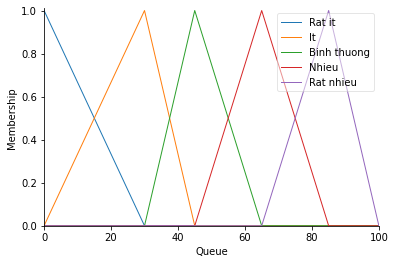

In [6]:
Q["Rat it"] = fz.trimf( Q.universe,[0,0,30])
Q["It"] = fz.trimf( Q.universe,[0,30,45])
Q["Binh thuong"] = fz.trimf( Q.universe,[30,45,65])
Q["Nhieu"] = fz.trimf( Q.universe,[45,65,85])
Q["Rat nhieu"] = fz.trapmf( Q.universe,[70,75,85,100])
Q.view()

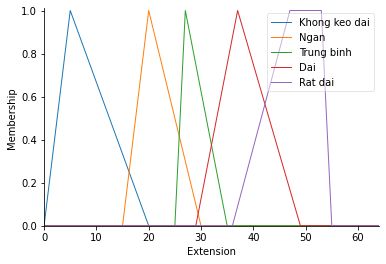

In [7]:
E["Khong keo dai"] = fz.trimf( E.universe,[0,5,20])
E["Ngan"] = fz.trimf( E.universe,[15,20,30])
E["Trung binh"] = fz.trimf( E.universe,[25,27,35])
E["Dai"] = fz.trimf( E.universe,[29,37,49])
E["Rat dai"] = fz.trapmf(E.universe,[36,47,53,55])
E.view()

#Tập luật:

In [8]:
R1  = ctrl.Rule(  Q["Rat it"] & A["Rat it"], E["Khong keo dai"] )
R2  = ctrl.Rule(  Q["Rat it"] & A["It"], E["Ngan"] )
R3  = ctrl.Rule(  Q["Rat it"] & A["Binh thuong"], E["Trung binh"] )
R4  = ctrl.Rule(  Q["Rat it"] & A["Nhieu"], E["Dai"] )
R5  = ctrl.Rule(  Q["Rat it"] & A["Rat nhieu"], E["Rat dai"] )

R6  = ctrl.Rule(  Q["It"]  & A["Rat it"], E["Khong keo dai"]  )
R7  = ctrl.Rule(  Q["It"]  & A["It"], E["Ngan"] )
R8  = ctrl.Rule(  Q["It"]  & A["Binh thuong"], E["Trung binh"] )
R9  = ctrl.Rule(  Q["It"]  & A["Nhieu"], E["Dai"] )
R10 = ctrl.Rule(  Q["It"]  & A["Rat nhieu"], E["Dai"] )

R11 = ctrl.Rule(  Q["Binh thuong"] & A["Rat it"], E["Khong keo dai"] )
R12 = ctrl.Rule(  Q["Binh thuong"] & A["It"], E["Khong keo dai"] )
R13 = ctrl.Rule(  Q["Binh thuong"] & A["Binh thuong"], E["Ngan"] )
R14 = ctrl.Rule(  Q["Binh thuong"] & A["Nhieu"], E["Trung binh"] )
R15 = ctrl.Rule(  Q["Binh thuong"] & A["Rat nhieu"], E["Dai"] )

R16 = ctrl.Rule(  Q["Nhieu"] & A["Rat it"], E["Khong keo dai"] )
R17 = ctrl.Rule(  Q["Nhieu"] & A["It"], E["Khong keo dai"] )
R18 = ctrl.Rule(  Q["Nhieu"] & A["Binh thuong"], E["Khong keo dai"] )
R19 = ctrl.Rule(  Q["Nhieu"] & A["Nhieu"], E["Ngan"] )
R20 = ctrl.Rule(  Q["Nhieu"] & A["Rat nhieu"], E["Trung binh"])

R21 = ctrl.Rule(  Q["Rat nhieu"] & A["Rat it"], E["Khong keo dai"] )
R22 = ctrl.Rule(  Q["Rat nhieu"] & A["It"], E["Khong keo dai"] )
R23 = ctrl.Rule(  Q["Rat nhieu"] & A["Binh thuong"], E["Trung binh"])
R24 = ctrl.Rule(  Q["Rat nhieu"] & A["Nhieu"], E["Dai"])
R25 = ctrl.Rule(  Q["Rat nhieu"] & A["Rat nhieu"], E["Rat dai"])

In [9]:
rules = [R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24,R25]

In [10]:
##model
system = ctrl.ControlSystemSimulation( ctrl.ControlSystem(rules) )

**INPUT :**


In [11]:

##input
A = int(input("Số phương tiện lưu thông ở đèn xanh [0,100]: "))
Q = int(input("Số phương tiện chờ ở đèn đỏ [0,100]: "))


system.input["Arrival"] = A
system.input["Queue"] = Q


Số phương tiện lưu thông ở đèn xanh [0,100]: 55
Số phương tiện chờ ở đèn đỏ [0,100]: 27


**Process & output :**

---------------------------------------------------------
Với số phương tiện lưu thông ở đèn xanh là 55 và số phương tiện chờ ở đèn đỏ 27;
Thì thời gian kéo dài đèn xanh là : 35 giây.


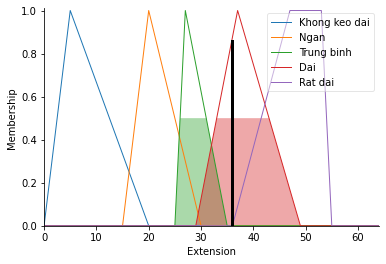

In [14]:
system.compute() 
oE = system.output["Extension"];oE = int(oE)
E.view( system )

print("---------------------------------------------------------")
print("Với số phương tiện lưu thông ở đèn xanh là {} và số phương tiện chờ ở đèn đỏ {};\nThì thời gian kéo dài đèn xanh là : {} giây.".format(A,Q,oE))